In [1]:
# Importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
# 1. Load and Explore Dataset
# We'll use the Iris dataset - a classic classification dataset that works well for clustering

# Load dataset
iris = load_iris()
X = iris.data  # Feature matrix
y = iris.target  # True labels (for final evaluation)
feature_names = iris.feature_names

# Create DataFrame for exploration
df = pd.DataFrame(X, columns=feature_names)
df['species'] = iris.target_names[y]

# Show data sample
print("Data samples:")
df.head()

Data samples:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


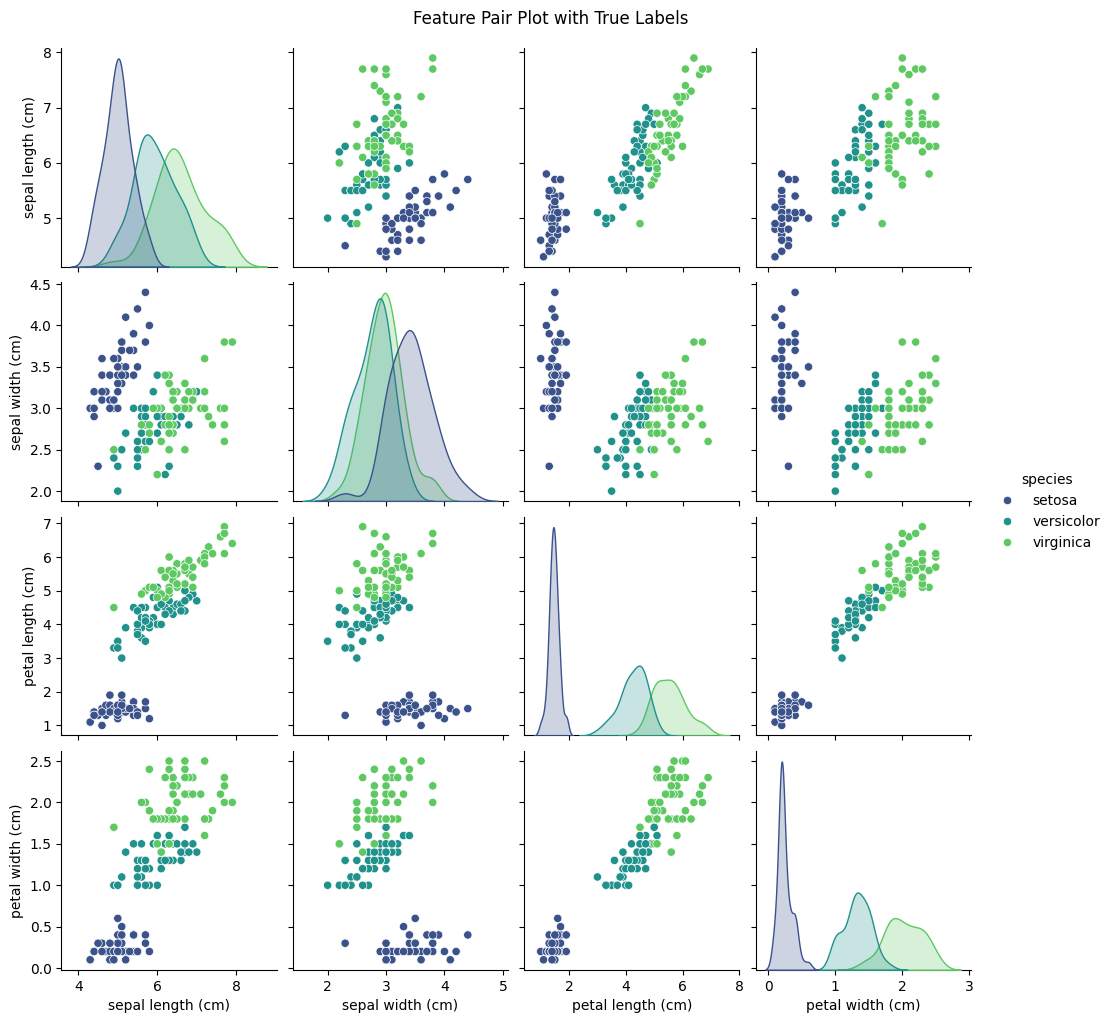

In [3]:
# Visualize feature distributions
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle("Feature Pair Plot with True Labels", y=1.02)
plt.show()

In [4]:
# 2. Data Preprocessing
# Clustering algorithms like K-Means require feature scaling

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (we'll use test set for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

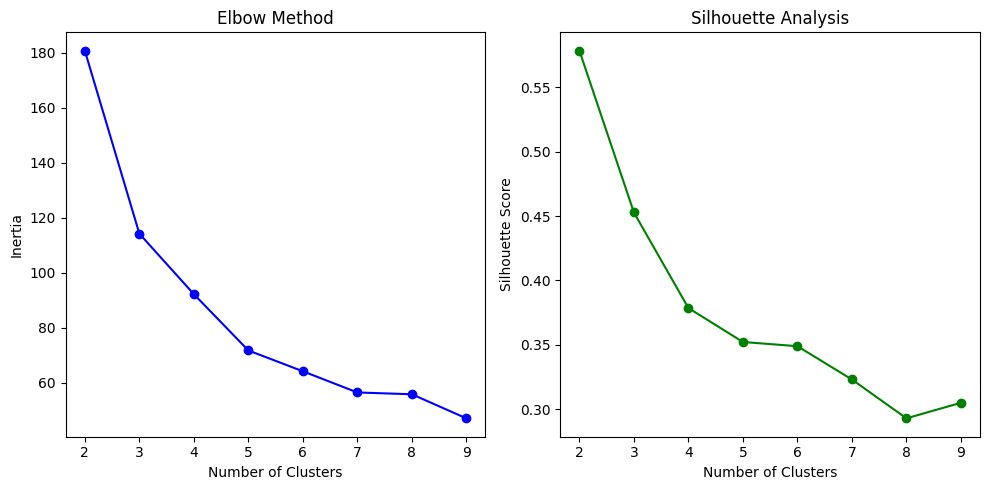

In [5]:
# 3. Hyperparameter Tuning (Elbow Method & Silhouette Analysis)
# We'll find optimal number of clusters (k) using validation

# Define range of k values to test
k_values = range(2, 10)
inertias = []
silhouette_scores = []

# Calculate metrics for different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_train)

    inertias.append(kmeans.inertia_)  # Inertia: Sum of squared distances to cluster centers
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

# Elbow method visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Silhouette score visualization
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()


In [6]:
# 4. Final Model Training
# Select best k based on validation results

# Choose best k (modify based on your analysis)
best_k = 3  # For Iris dataset we know 3 is ground truth

# Train final model with best parameters
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
final_kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

Test Silhouette Score: 0.458
Adjusted Rand Index: 0.810


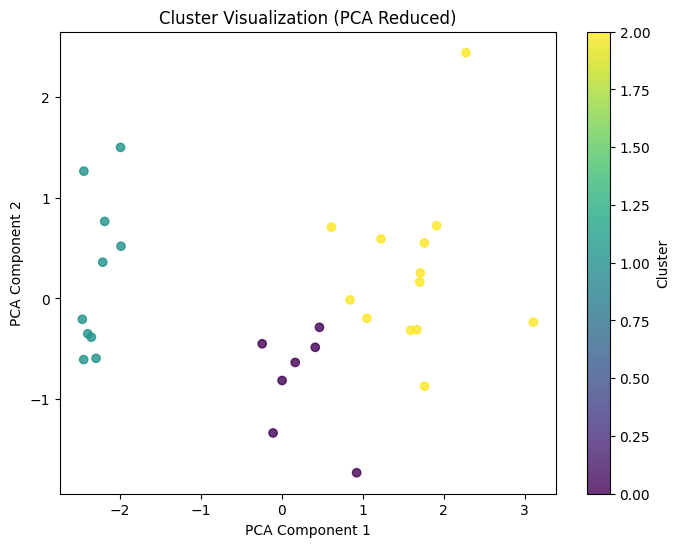

In [7]:
# 5. Evaluation & Visualization
# Evaluate on test set and visualize results

# Predict clusters for test set
test_clusters = final_kmeans.predict(X_test)

# Calculate evaluation metrics
test_silhouette = silhouette_score(X_test, test_clusters)
test_ari = adjusted_rand_score(y_test, test_clusters)  # Compare with true labels

print(f"Test Silhouette Score: {test_silhouette:.3f}")
print(f"Adjusted Rand Index: {test_ari:.3f}")

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=test_clusters, cmap='viridis', alpha=0.8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization (PCA Reduced)')
plt.colorbar(scatter, label='Cluster')
plt.show()
